In [27]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import re
from datetime import datetime
import chardet  # For detecting file encoding
from collections import defaultdict, Counter
import os
from typing import Dict, List, Tuple, Optional
from datetime import datetime, timedelta

# Set up basic visualization settings
plt.style.use('default')
sns.set()
%matplotlib inline

def detect_encoding(file_path):
    """Detect the encoding of a file using chardet"""
    with open(file_path, 'rb') as file:
        # Read a sample of the file to detect encoding
        raw_data = file.read(10000)  # Read first 10000 bytes
        result = chardet.detect(raw_data)
        return result['encoding']

In [5]:
pip install chardet 

Note: you may need to restart the kernel to use updated packages.


In [22]:
# Define paths
base_path = Path('../datasets/raw_drift_dataset')
hdfs_path = base_path / 'HDFS' / 'hdfs.log'
apache_path = base_path / 'Apache' / 'Apache.log'
health_path = base_path / 'HealthApp' / 'HealthApp.log'
bgl_path = base_path / 'BGL' / 'BGL.log'
hpc_path = base_path / 'HPC' / 'HPC.log'
linux_path = base_path / 'Linux' / 'Linux.log'
mac_path = base_path / 'Mac' / 'Mac.log'

def read_logs(file_path):
    """Read log files and return non-empty lines."""
    # Try different encodings
    encodings = ['utf-8', 'latin1', 'iso-8859-1']
    
    for encoding in encodings:
        try:
            with open(file_path, 'r', encoding=encoding) as f:
                return [line.strip() for line in f.readlines() if line.strip()]
        except UnicodeDecodeError:
            continue
    
    # If all encodings fail, use latin1 with error replacement
    with open(file_path, 'r', encoding='latin1', errors='replace') as f:
        return [line.strip() for line in f.readlines() if line.strip()]

# Read logs
print("Reading log files...")
hdfs_logs = read_logs(hdfs_path)
apache_logs = read_logs(apache_path)
health_logs = read_logs(health_path)
bgl_logs = read_logs(bgl_path)
hpc_logs = read_logs(hpc_path)
linux_logs = read_logs(linux_path)
mac_logs = read_logs(mac_path)

print(f"HDFS Logs: {len(hdfs_logs)} entries")
print(f"Apache Logs: {len(apache_logs)} entries")
print(f"HealthApp Logs: {len(health_logs)} entries")
print(f"BGL Logs: {len(bgl_logs)} entries")
print(f"HPC Logs: {len(hpc_logs)} entries")
print(f"Linux Logs: {len(linux_logs)} entries")
print(f"Mac Logs: {len(mac_logs)} entries")

# Show samples
print("\nSample log entries:")
for name, logs in [
    ("HDFS", hdfs_logs), 
    ("Apache", apache_logs), 
    ("HealthApp", health_logs),
    ("BGL", bgl_logs),
    ("HPC", hpc_logs),
    ("Linux", linux_logs),
    ("Mac", mac_logs)
]:
    print(f"\n{name} samples:")
    for log in logs[:3]:
        print(f"- {log}")

Reading log files...
HDFS Logs: 2000 entries
Apache Logs: 56482 entries
HealthApp Logs: 253395 entries
BGL Logs: 4747963 entries
HPC Logs: 433490 entries
Linux Logs: 25567 entries
Mac Logs: 116735 entries

Sample log entries:

HDFS samples:
- 081109 203615 148 INFO dfs.DataNode$PacketResponder: PacketResponder 1 for block blk_38865049064139660 terminating
- 081109 203807 222 INFO dfs.DataNode$PacketResponder: PacketResponder 0 for block blk_-6952295868487656571 terminating
- 081109 204005 35 INFO dfs.FSNamesystem: BLOCK* NameSystem.addStoredBlock: blockMap updated: 10.251.73.220:50010 is added to blk_7128370237687728475 size 67108864

Apache samples:
- [Thu Jun 09 06:07:04 2005] [notice] LDAP: Built with OpenLDAP LDAP SDK
- [Thu Jun 09 06:07:04 2005] [notice] LDAP: SSL support unavailable
- [Thu Jun 09 06:07:04 2005] [notice] suEXEC mechanism enabled (wrapper: /usr/sbin/suexec)

HealthApp samples:
- 20171223-22:15:29:606|Step_LSC|30002312|onStandStepChanged 3579
- 20171223-22:15:29:615


==================== Log Structure Analysis: HDFS ====================

Basic Statistics:
Total entries: 2000
Average length: 141.92 characters
Min length: 93 characters
Max length: 2520 characters


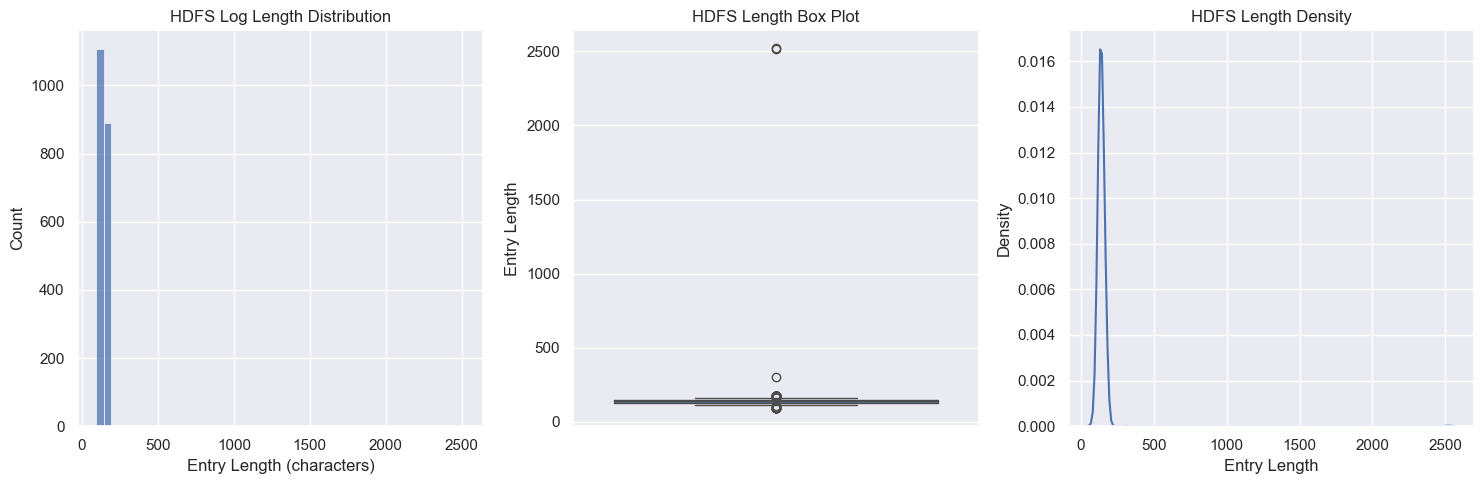


==================== Log Structure Analysis: Apache ====================

Basic Statistics:
Total entries: 56482
Average length: 89.93 characters
Min length: 34 characters
Max length: 187 characters


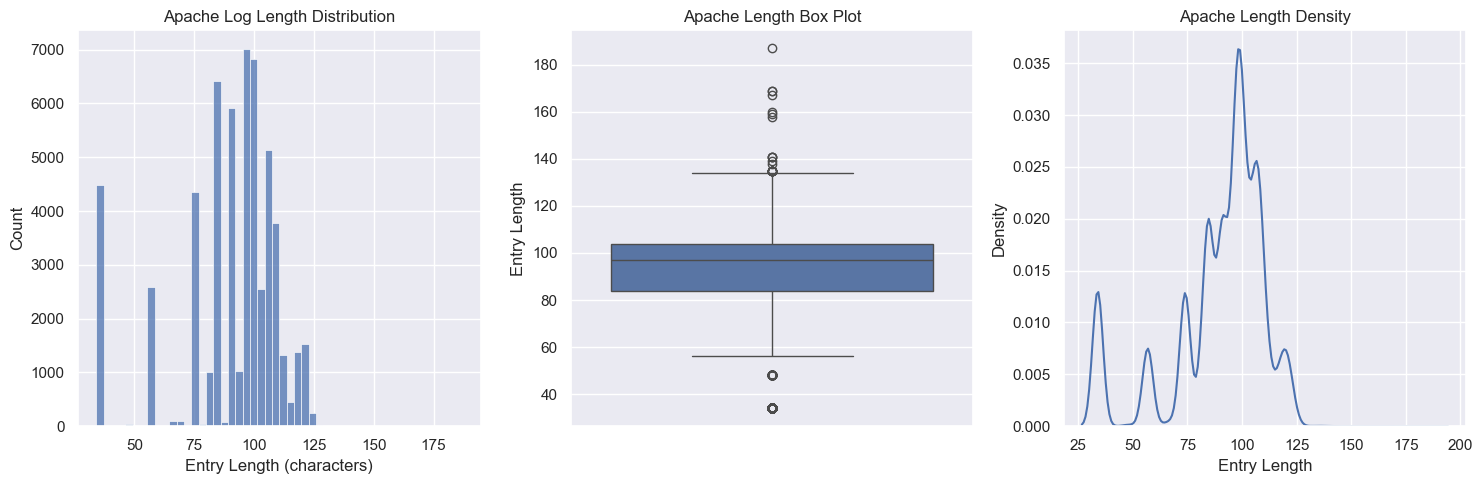


==================== Log Structure Analysis: HealthApp ====================

Basic Statistics:
Total entries: 253395
Average length: 90.86 characters
Min length: 48 characters
Max length: 294 characters


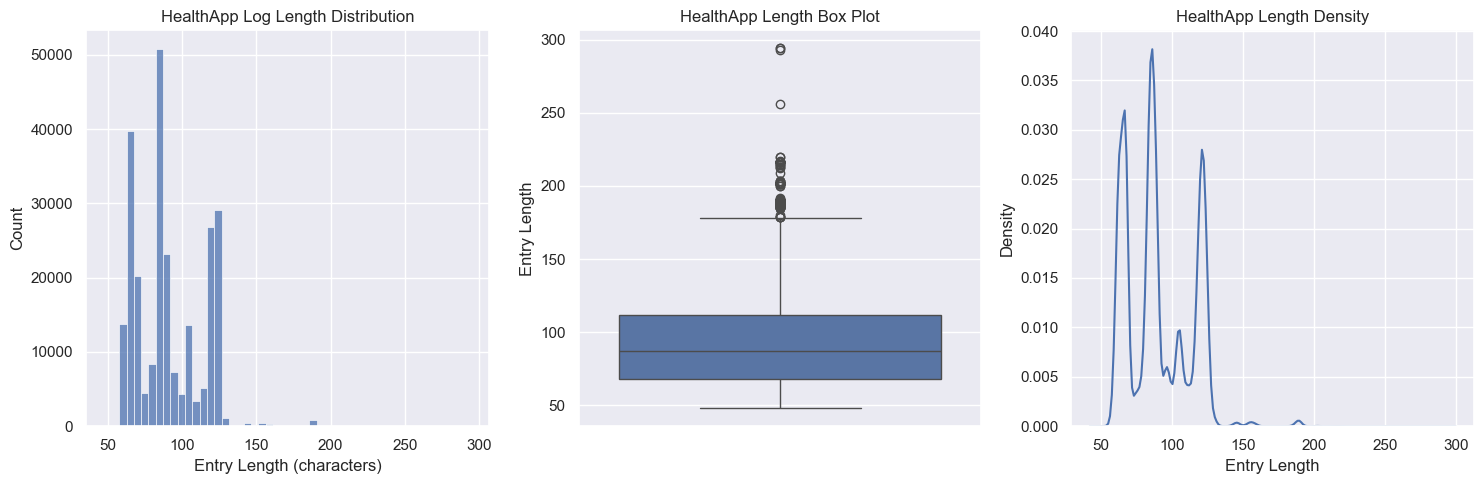


==================== Log Structure Analysis: BGL ====================

Basic Statistics:
Total entries: 4747963
Average length: 155.53 characters
Min length: 94 characters
Max length: 928 characters


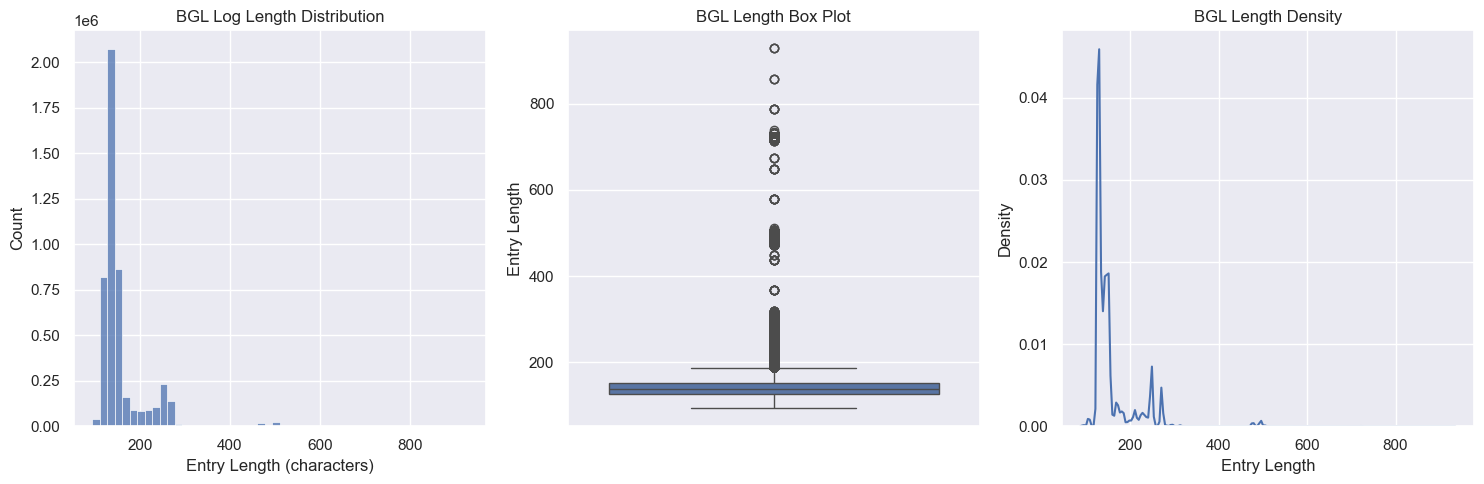


==================== Log Structure Analysis: HPC ====================

Basic Statistics:
Total entries: 433490
Average length: 75.40 characters
Min length: 43 characters
Max length: 895 characters


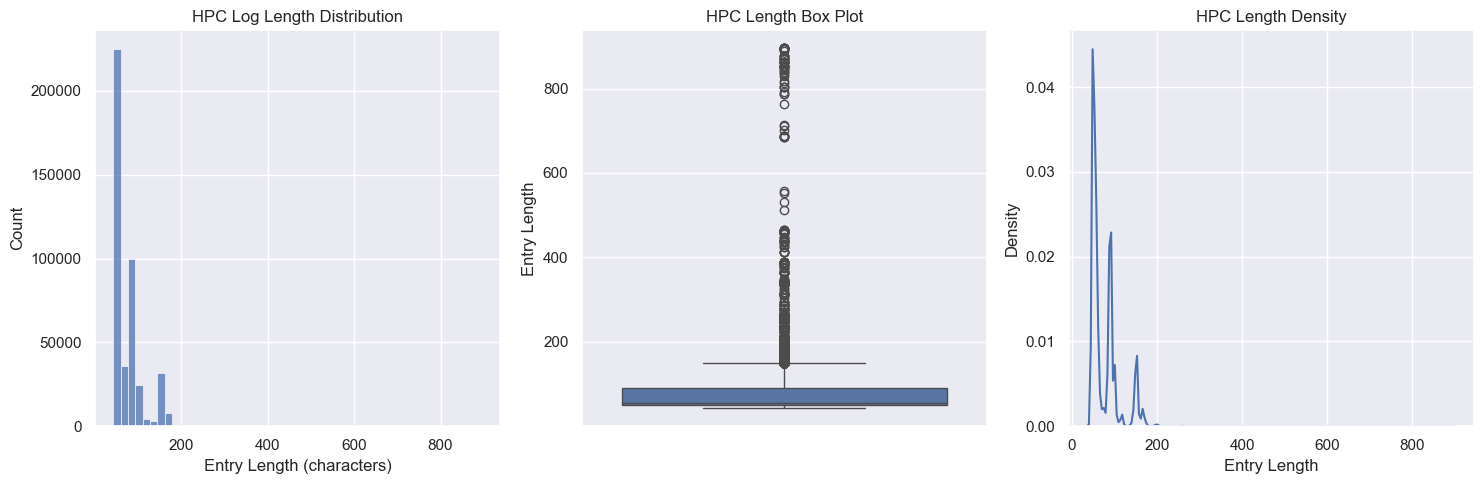


==================== Log Structure Analysis: Linux ====================

Basic Statistics:
Total entries: 25567
Average length: 90.72 characters
Min length: 28 characters
Max length: 1030 characters


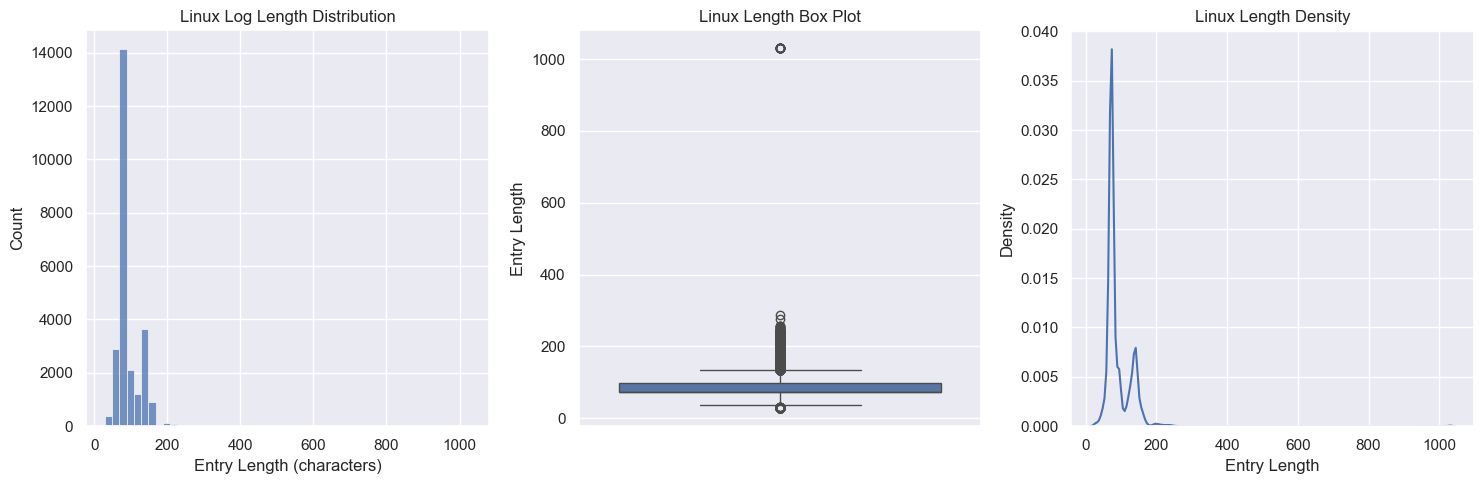


==================== Log Structure Analysis: Mac ====================

Basic Statistics:
Total entries: 116735
Average length: 142.16 characters
Min length: 1 characters
Max length: 1314 characters


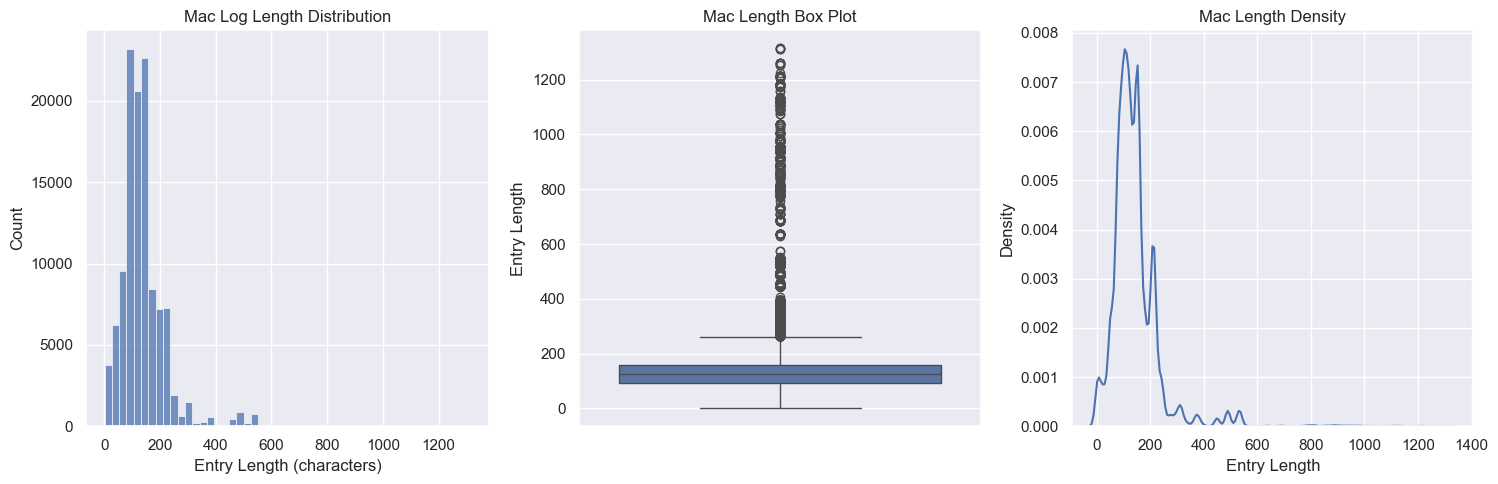

In [52]:
def analyze_log_structure(name: str, logs: List[str]):
    """Analyze the structure and characteristics of log entries"""
    print(f"\n{'='*20} Log Structure Analysis: {name} {'='*20}")
    
    # Basic statistics
    lengths = [len(log) for log in logs]
    
    print(f"\nBasic Statistics:")
    print(f"Total entries: {len(logs)}")
    print(f"Average length: {np.mean(lengths):.2f} characters")
    print(f"Min length: {min(lengths)} characters")
    print(f"Max length: {max(lengths)} characters")
    
    # Visualize length distribution
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    sns.histplot(lengths, bins=50)
    plt.title(f"{name} Log Length Distribution")
    plt.xlabel("Entry Length (characters)")
    plt.ylabel("Count")
    
    plt.subplot(132)
    sns.boxplot(y=lengths)
    plt.title(f"{name} Length Box Plot")
    plt.ylabel("Entry Length")
    
    plt.subplot(133)
    sns.kdeplot(lengths)
    plt.title(f"{name} Length Density")
    plt.xlabel("Entry Length")
    
    plt.tight_layout()
    # Save the figure before showing
    plt.savefig(f'{name.lower()}_structure.png')
    
    # Now show the plot
    plt.show()
    
    # Close the figure to free memory
    plt.close()
   


analyze_log_structure("HDFS", hdfs_logs)
analyze_log_structure("Apache", apache_logs)
analyze_log_structure("HealthApp", health_logs)
analyze_log_structure("BGL", bgl_logs)
analyze_log_structure("HPC", hpc_logs)
analyze_log_structure("Linux", linux_logs)
analyze_log_structure("Mac", mac_logs)




==================== Message Type Analysis: HDFS ====================

Message Type Distribution:
Error: 80 (4.00%)
Info: 1920 (96.00%)
Debug: 0 (0.00%)
Critical: 0 (0.00%)


/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_53921/1554405236.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lengths for lengths in type_lengths.values()], labels=type_lengths.keys())


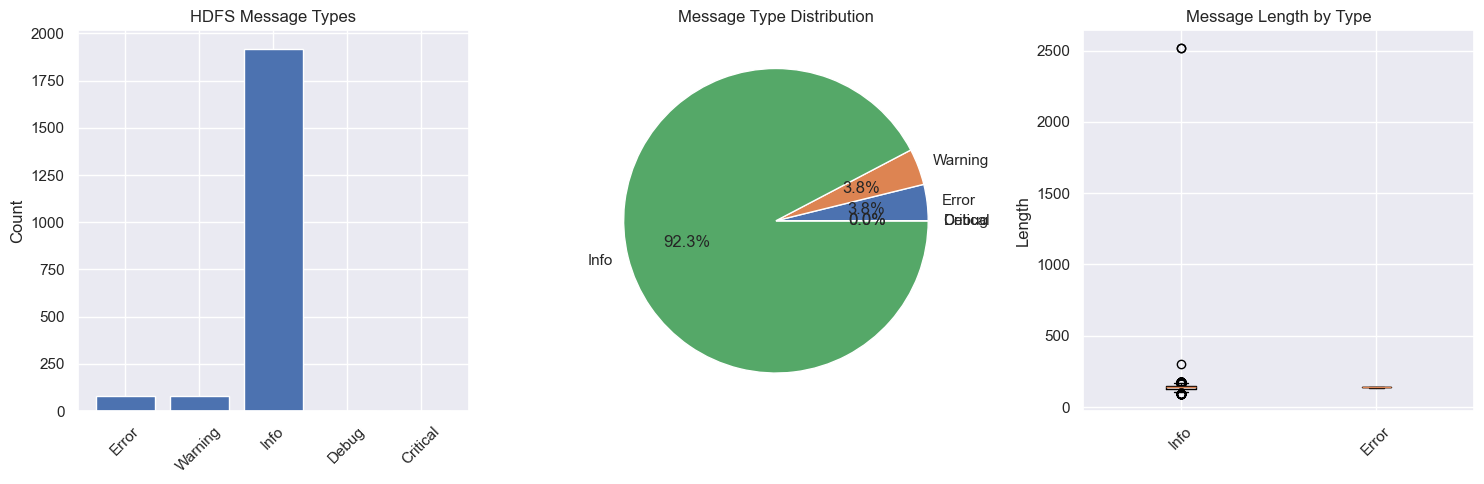


==================== Message Type Analysis: Apache ====================

Message Type Distribution:
Error: 38081 (67.42%)
Info: 13755 (24.35%)
Debug: 0 (0.00%)
Critical: 0 (0.00%)


/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_53921/1554405236.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lengths for lengths in type_lengths.values()], labels=type_lengths.keys())


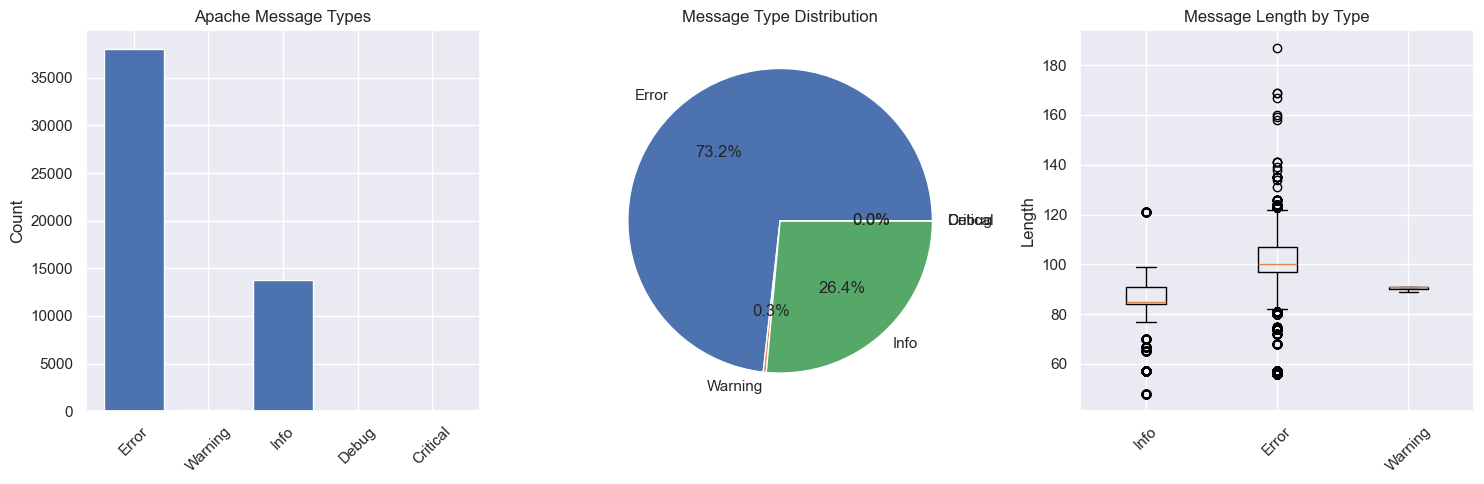


==================== Message Type Analysis: HealthApp ====================

Message Type Distribution:
Error: 1704 (0.67%)
Info: 25 (0.01%)
Debug: 5 (0.00%)
Critical: 0 (0.00%)


/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_53921/1554405236.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lengths for lengths in type_lengths.values()], labels=type_lengths.keys())


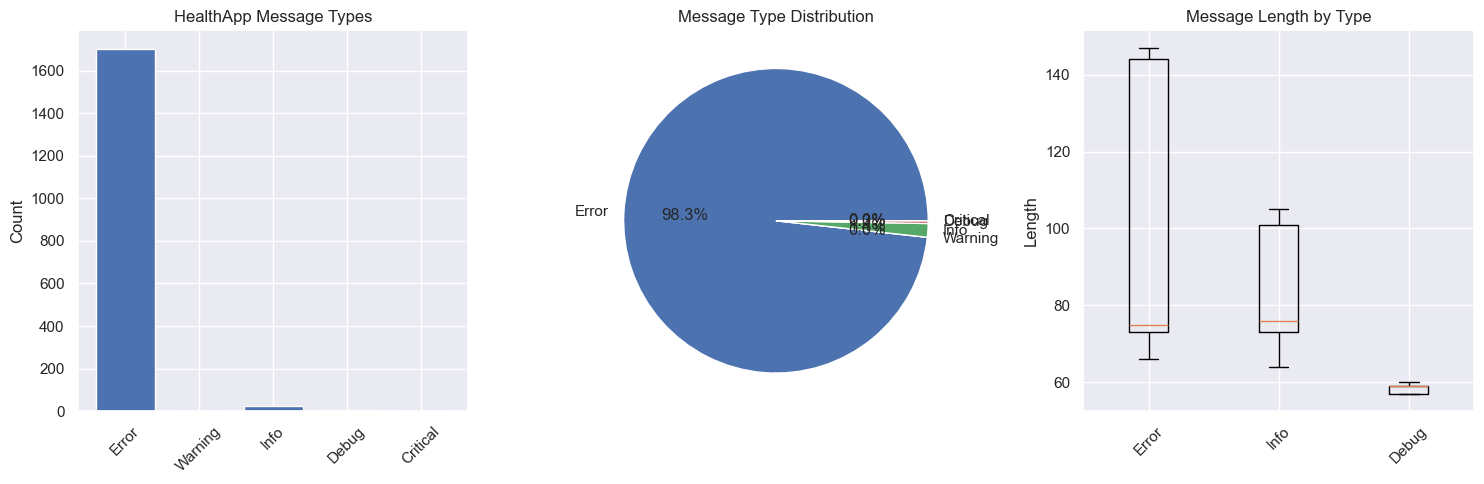


==================== Message Type Analysis: BGL ====================

Message Type Distribution:
Error: 1394876 (29.38%)
Info: 3753221 (79.05%)
Debug: 107097 (2.26%)
Critical: 1001828 (21.10%)


/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_53921/1554405236.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lengths for lengths in type_lengths.values()], labels=type_lengths.keys())


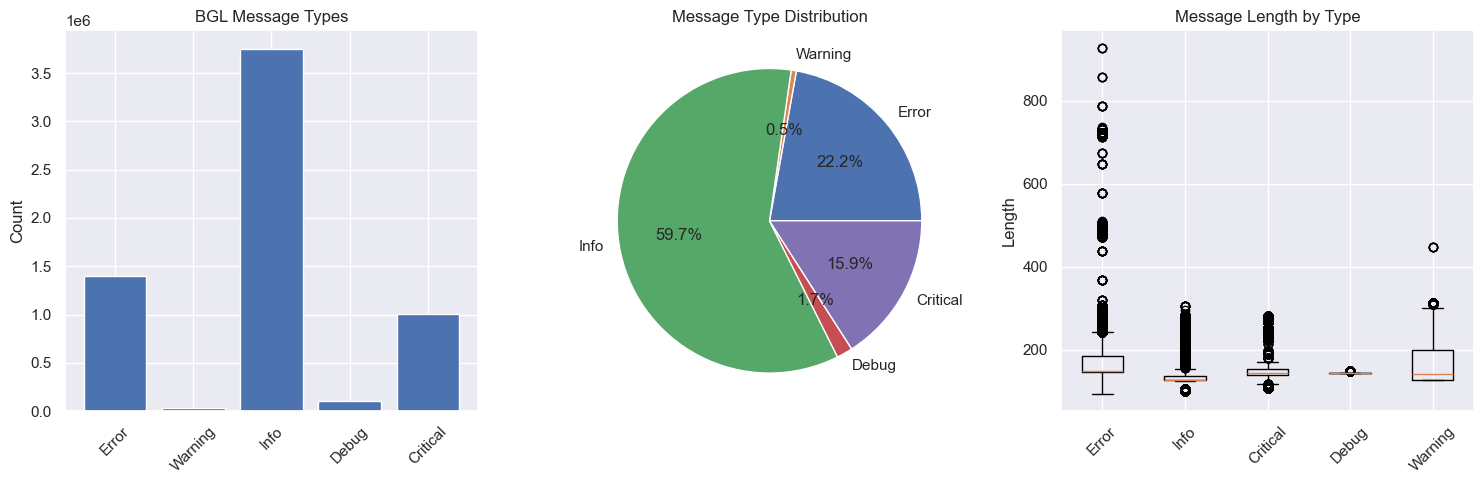


==================== Message Type Analysis: HPC ====================

Message Type Distribution:
Error: 111016 (25.61%)
Info: 1 (0.00%)
Debug: 0 (0.00%)
Critical: 4629 (1.07%)


/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_53921/1554405236.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lengths for lengths in type_lengths.values()], labels=type_lengths.keys())


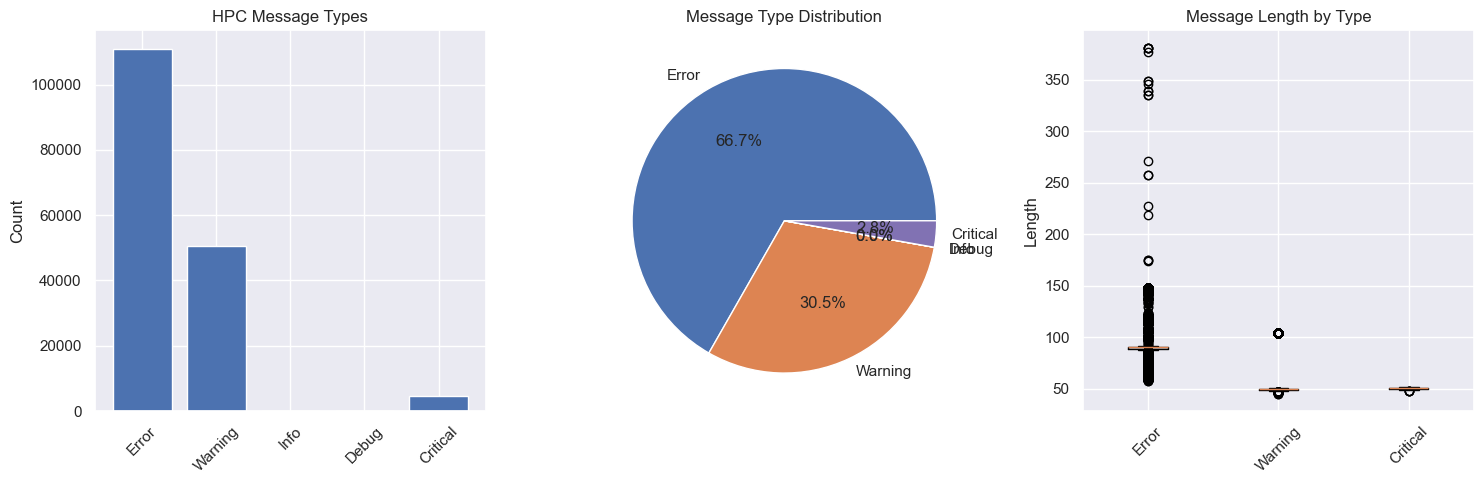


==================== Message Type Analysis: Linux ====================

Message Type Distribution:
Error: 4181 (16.35%)
Info: 50 (0.20%)
Debug: 99 (0.39%)
Critical: 0 (0.00%)


/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_53921/1554405236.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lengths for lengths in type_lengths.values()], labels=type_lengths.keys())


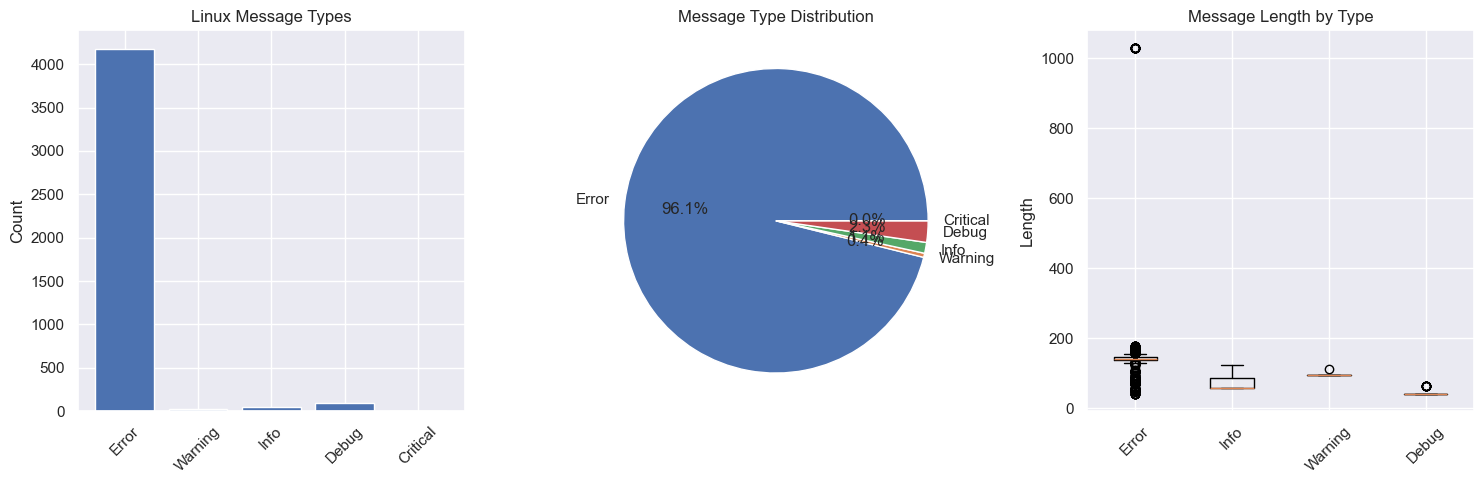


==================== Message Type Analysis: Mac ====================

Message Type Distribution:
Error: 19089 (16.35%)
Info: 4124 (3.53%)
Debug: 539 (0.46%)
Critical: 0 (0.00%)


/var/folders/dr/8_j4tm8j7_v5ymfll6_zyz4w0000gn/T/ipykernel_53921/1554405236.py:48: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([lengths for lengths in type_lengths.values()], labels=type_lengths.keys())


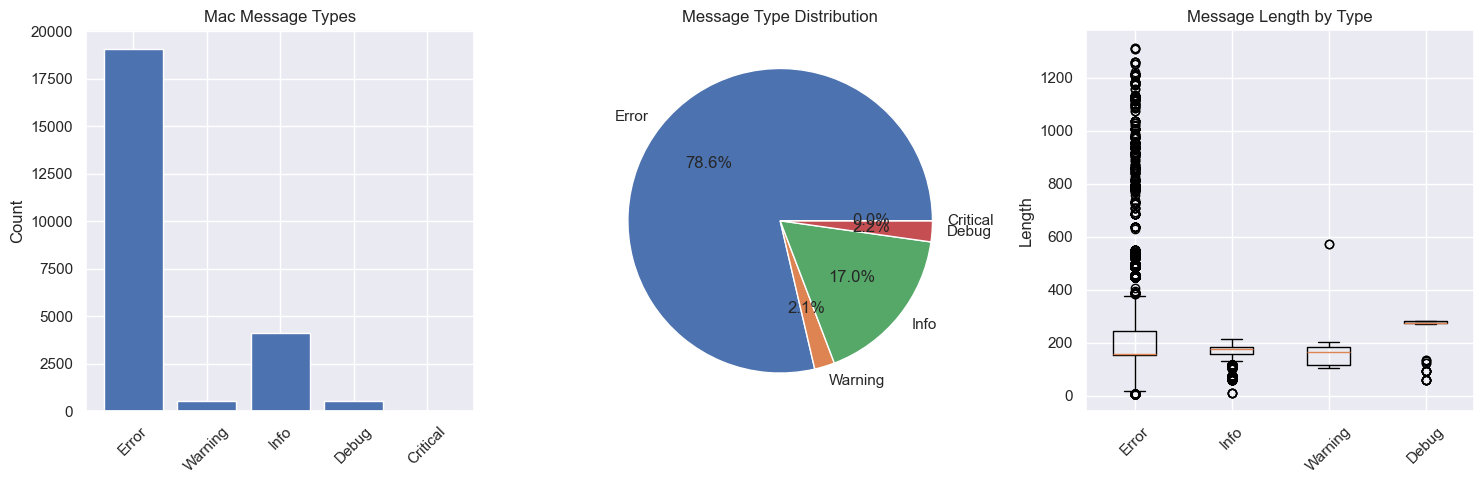

In [53]:
def analyze_message_types(name: str, logs: List[str]):
    """Analyze different types of messages and their patterns"""
    print(f"\n{'='*20} Message Type Analysis: {name} {'='*20}")
    
    # Define patterns for different message types
    patterns = {
        'Error': r'error|ERROR|Error|FAIL|fail|Fail|EXCEPTION|exception|Exception',
        'Warning': r'warn|WARN|Warn|WARNING|warning|Warning',
        'Info': r'info|INFO|Info|NOTICE|notice|Notice',
        'Debug': r'debug|DEBUG|Debug|TRACE|trace|Trace',
        'Critical': r'critical|CRITICAL|Critical|FATAL|fatal|Fatal|EMERGENCY|emergency|Emergency'
    }
    
    # Count occurrences
    type_counts = {type_name: sum(1 for log in logs if re.search(pattern, log)) 
                  for type_name, pattern in patterns.items()}
    
    # Calculate percentages
    total = len(logs)
    percentages = {type_name: (count/total)*100 for type_name, count in type_counts.items()}
    
    print("\nMessage Type Distribution:")
    for type_name, count in type_counts.items():
        print(f"{type_name}: {count} ({percentages[type_name]:.2f}%)")
    
    # Visualizations
    plt.figure(figsize=(15, 5))
    
    plt.subplot(131)
    plt.bar(type_counts.keys(), type_counts.values())
    plt.title(f"{name} Message Types")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    
    plt.subplot(132)
    plt.pie(percentages.values(), labels=percentages.keys(), autopct='%1.1f%%')
    plt.title("Message Type Distribution")
    
    # Message length by type
    plt.subplot(133)
    type_lengths = defaultdict(list)
    for log in logs:
        for type_name, pattern in patterns.items():
            if re.search(pattern, log):
                type_lengths[type_name].append(len(log))
                break
    
    plt.boxplot([lengths for lengths in type_lengths.values()], labels=type_lengths.keys())
    plt.title("Message Length by Type")
    plt.xticks(rotation=45)
    plt.ylabel("Length")
    
    plt.tight_layout()
    plt.savefig(f'{name.lower()}_message_type.png')
    
    # Now show the plot
    plt.show()
    
    # Close the figure to free memory
    plt.close()

# Example usage:
analyze_message_types("HDFS", hdfs_logs)
analyze_message_types("Apache", apache_logs)
analyze_message_types("HealthApp", health_logs)
analyze_message_types("BGL", bgl_logs)
analyze_message_types("HPC", hpc_logs)
analyze_message_types("Linux", linux_logs)
analyze_message_types("Mac", mac_logs)


==================== Temporal Pattern Analysis: HDFS ====================

Temporal Statistics:
Timestamps found: 2000
Time range: 2008-11-09 20:36:15 to 2008-11-11 10:20:17
Average time between logs: 67.95 seconds
Min time between logs: 0.00 seconds
Max time between logs: 3481.00 seconds


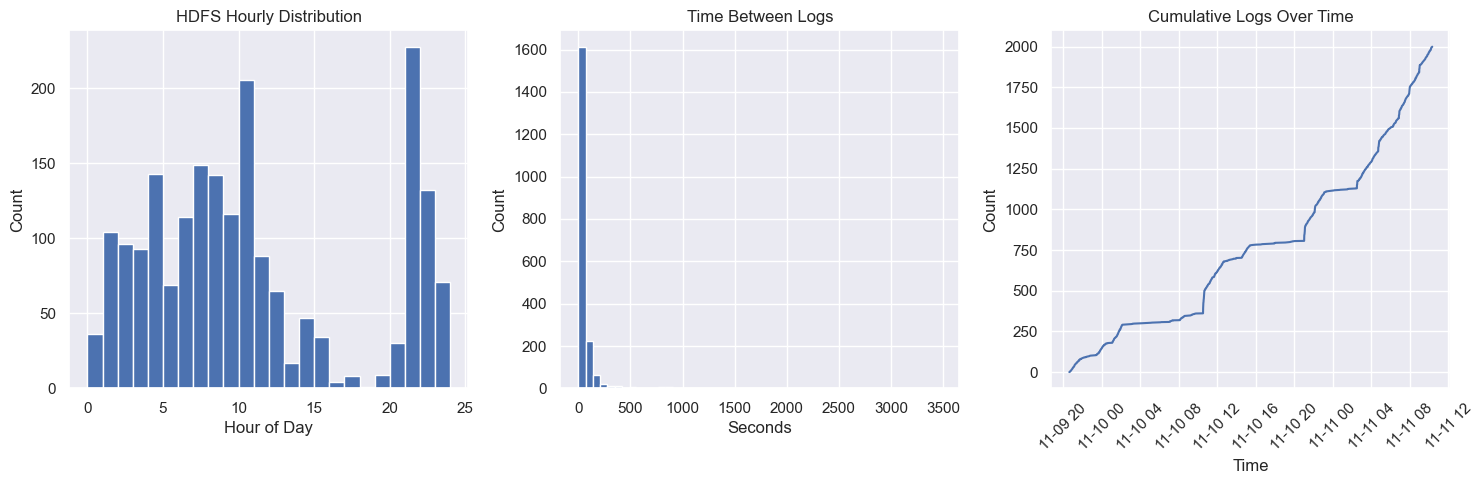


Temporal Patterns:
Most common hours: [(21, 227), (10, 205), (7, 149)]
Most common days: [(10, 965), (11, 885), (9, 150)]
Most common months: [(11, 2000)]
Most common weekdays: [(0, 965), (1, 885), (6, 150)]

==================== Temporal Pattern Analysis: Apache ====================

Temporal Statistics:
Timestamps found: 52004
Time range: 1900-01-01 04:02:13 to 1900-12-25 04:02:20
Average time between logs: -167.96 seconds
Min time between logs: -30931207.00 seconds
Max time between logs: 604794.00 seconds


<Figure size 640x480 with 0 Axes>

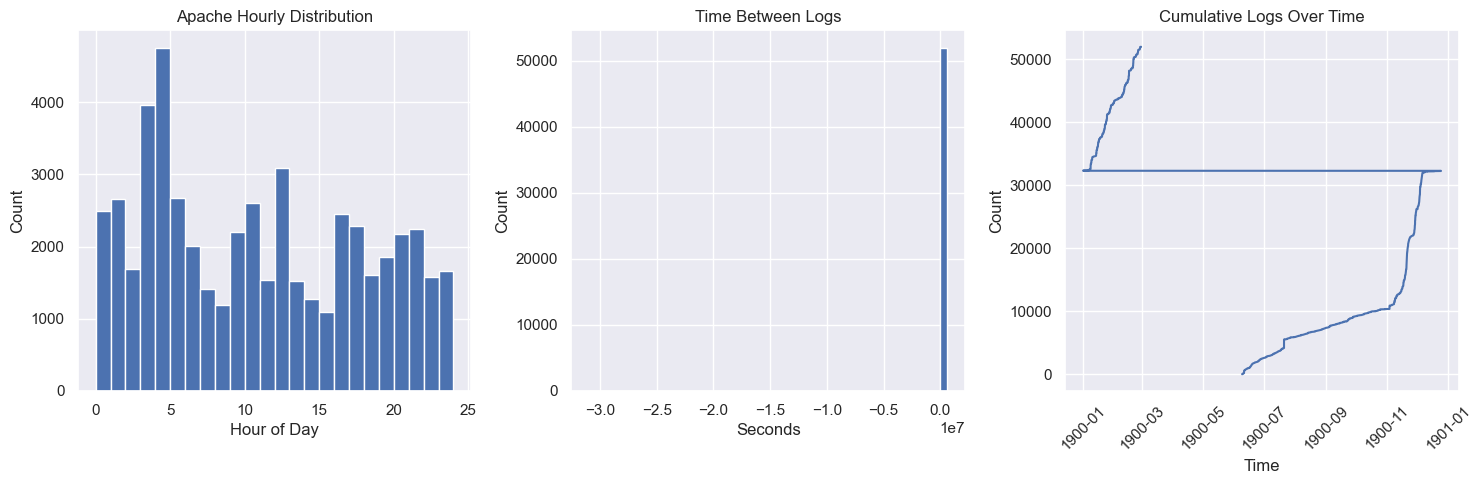


Temporal Patterns:
Most common hours: [(4, 4761), (3, 3958), (12, 3087)]
Most common days: [(21, 4247), (20, 4121), (22, 2431)]
Most common months: [(11, 15862), (1, 10905), (2, 8790)]
Most common weekdays: [(1, 10173), (3, 8324), (2, 8285)]

==================== Temporal Pattern Analysis: HealthApp ====================

Temporal Statistics:
Timestamps found: 14
Time range: 2018-01-02 18:52:59 to 2018-01-02 18:52:59
Average time between logs: 0.00 seconds
Min time between logs: 0.00 seconds
Max time between logs: 0.00 seconds


<Figure size 640x480 with 0 Axes>

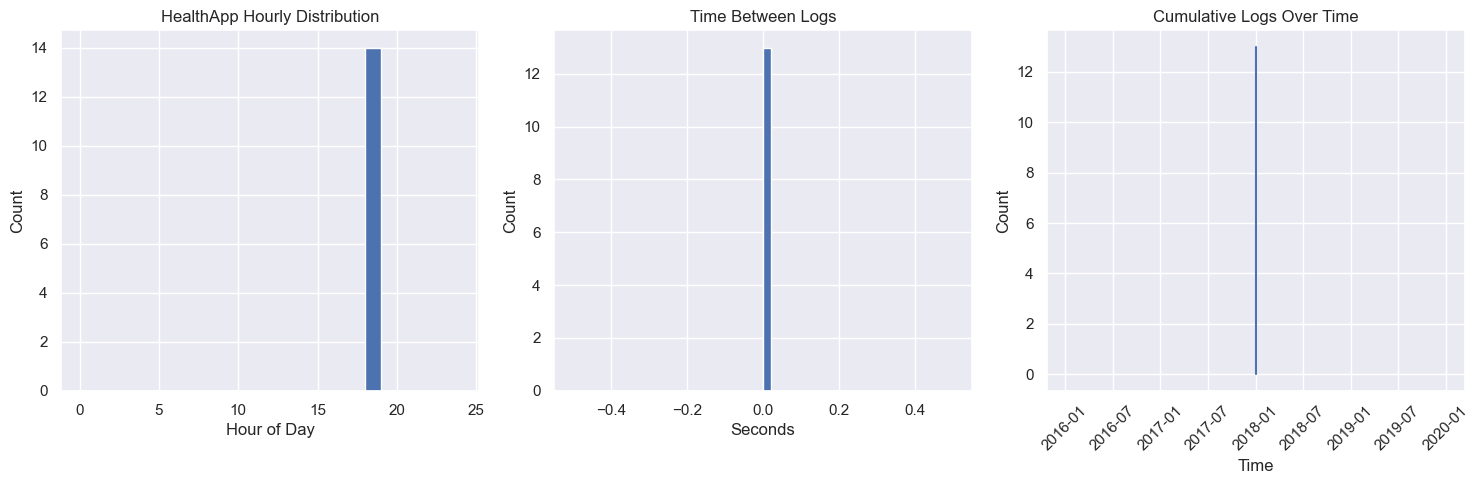


Temporal Patterns:
Most common hours: [(18, 14)]
Most common days: [(2, 14)]
Most common months: [(1, 14)]
Most common weekdays: [(1, 14)]

==================== Temporal Pattern Analysis: BGL ====================

Temporal Statistics:
Timestamps found: 11925
Time range: 1900-06-17 07:25:00 to 2055-09-19 00:00:04
Average time between logs: 1415.56 seconds
Min time between logs: -4882857001.00 seconds
Max time between logs: 4884589217.00 seconds


<Figure size 640x480 with 0 Axes>

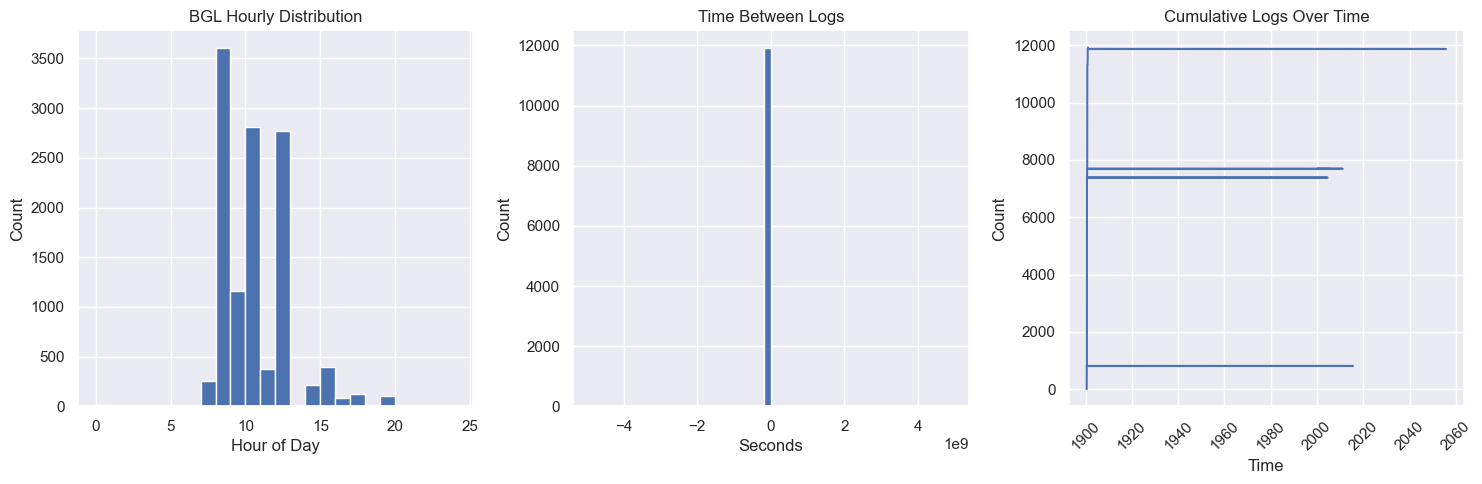


Temporal Patterns:
Most common hours: [(8, 3602), (10, 2807), (12, 2772)]
Most common days: [(20, 3384), (4, 3232), (9, 2691)]
Most common months: [(8, 6587), (9, 3899), (7, 809)]
Most common weekdays: [(3, 6390), (5, 3263), (6, 1060)]

==================== Temporal Pattern Analysis: HPC ====================
No timestamps found in the logs

First few log entries for format reference:
- 460903 resourcemgmtdaeomon node-25 server subsys 1145552216 1 failed to configure resourcemgmt subsystem err = 10
- 460919 resourcemgmtdaeomon node-25 server subsys 1145552221 1 failed to configure resourcemgmt subsystem err = 10
- 460932 resourcemgmtdaeomon node-25 server subsys 1145552226 1 failed to configure resourcemgmt subsystem err = 10

==================== Temporal Pattern Analysis: Linux ====================

Temporal Statistics:
Timestamps found: 25567
Time range: 1900-01-01 04:02:05 to 1900-12-31 04:07:34
Average time between logs: -341.51 seconds
Min time between logs: -31449929.00 seconds


<Figure size 640x480 with 0 Axes>

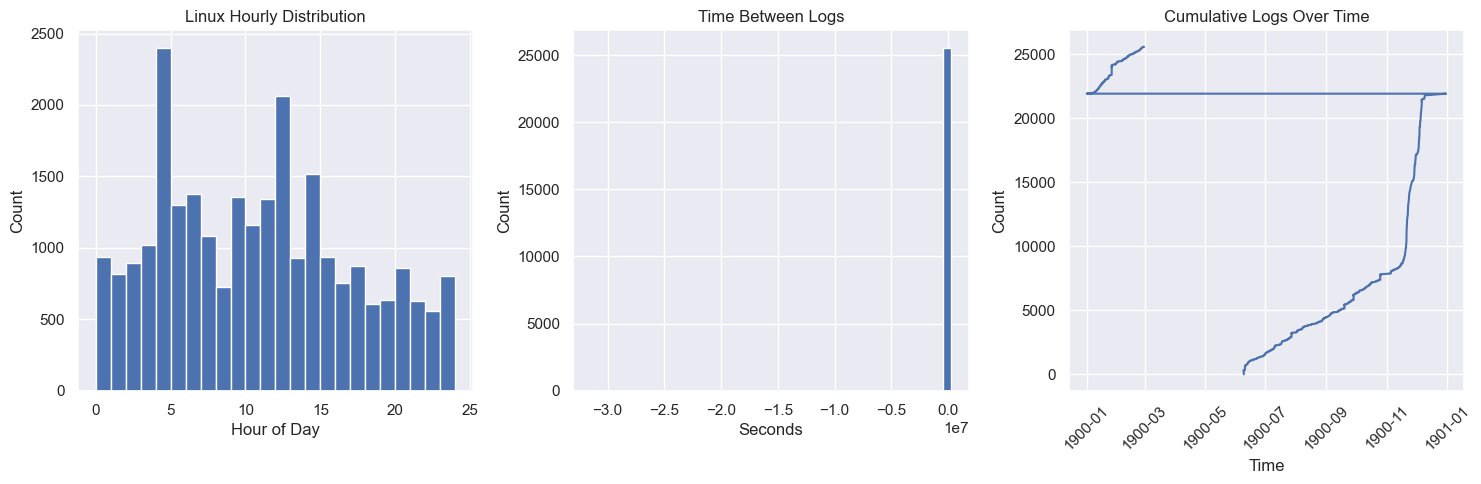


Temporal Patterns:
Most common hours: [(4, 2402), (12, 2061), (14, 1514)]
Most common days: [(21, 1961), (4, 1541), (22, 1491)]
Most common months: [(11, 9315), (12, 4750), (1, 2439)]
Most common weekdays: [(2, 4927), (3, 4687), (1, 4090)]

==================== Temporal Pattern Analysis: Mac ====================

Temporal Statistics:
Timestamps found: 107201
Time range: 1900-07-01 08:58:36 to 2017-07-08 15:51:26
Average time between logs: 5.64 seconds
Min time between logs: -3692271599.00 seconds
Max time between logs: 3692271600.00 seconds


<Figure size 640x480 with 0 Axes>

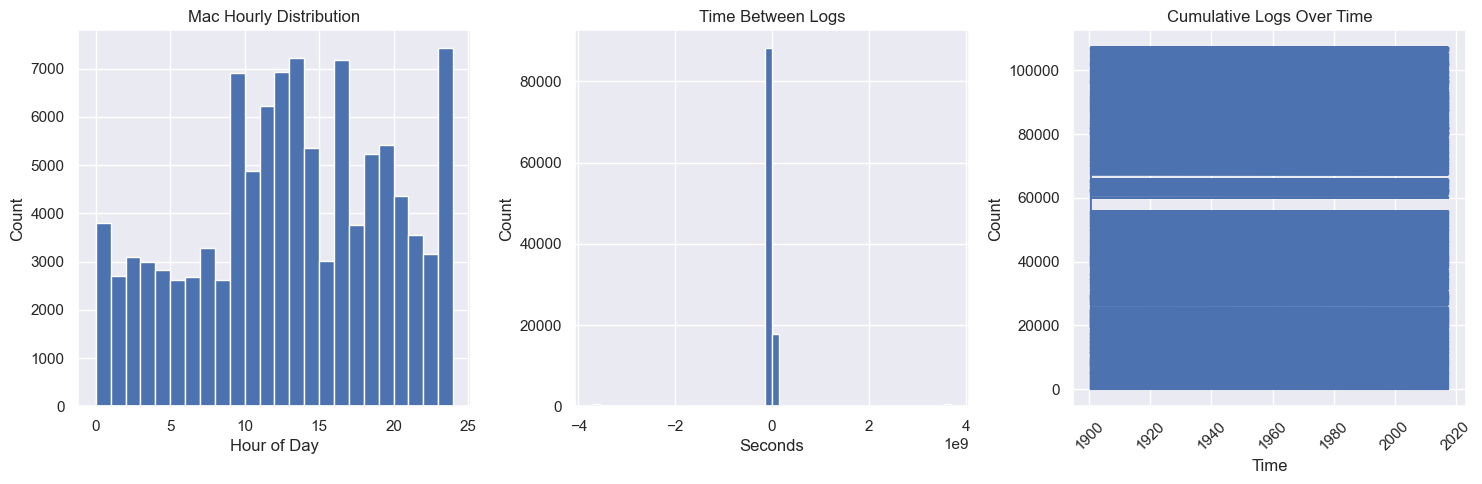


Temporal Patterns:
Most common hours: [(23, 7420), (13, 7228), (16, 7174)]
Most common days: [(4, 21800), (3, 19108), (7, 15962)]
Most common months: [(7, 107162), (2, 39)]
Most common weekdays: [(2, 21748), (1, 19151), (6, 16609)]


<Figure size 640x480 with 0 Axes>

In [48]:
def analyze_temporal_patterns(name: str, logs: List[str]):
    """Analyze temporal patterns in log entries"""
    print(f"\n{'='*20} Temporal Pattern Analysis: {name} {'='*20}")
    
    # Extended timestamp patterns
    timestamp_patterns = [
        # HDFS format (e.g., "081109 203518" for Nov 9, 2008 20:35:18)
        (r'(\d{6}\s+\d{6})', '%y%m%d %H%M%S'),
        # ISO format
        (r'(\d{4}-\d{2}-\d{2}\s+\d{2}:\d{2}:\d{2})', '%Y-%m-%d %H:%M:%S'),
        # Syslog format
        (r'(\w{3}\s+\d{1,2}\s+\d{2}:\d{2}:\d{2})', '%b %d %H:%M:%S'),
        # Common log format
        (r'(\d{2}/\d{2}/\d{4}\s+\d{2}:\d{2}:\d{2})', '%m/%d/%Y %H:%M:%S'),
        # Apache format
        (r'\[(\d{2}/\w{3}/\d{4}:\d{2}:\d{2}:\d{2})', '%d/%b/%Y:%H:%M:%S')
    ]
    
    timestamps = []
    for log in logs:
        for pattern, time_format in timestamp_patterns:
            match = re.search(pattern, log)
            if match:
                try:
                    timestamp_str = match.group(1)
                    # For HDFS format, add century (assuming 20xx)
                    if len(timestamp_str) == 13 and ' ' in timestamp_str:  # HDFS format
                        timestamp = datetime.strptime(f"20{timestamp_str}", '%Y%m%d %H%M%S')
                    else:
                        timestamp = datetime.strptime(timestamp_str, time_format)
                    timestamps.append(timestamp)
                    break
                except ValueError:
                    continue
    
    if timestamps:
        print(f"\nTemporal Statistics:")
        print(f"Timestamps found: {len(timestamps)}")
        print(f"Time range: {min(timestamps)} to {max(timestamps)}")
        
        # Calculate time differences
        time_diffs = [(timestamps[i+1] - timestamps[i]).total_seconds() 
                     for i in range(len(timestamps)-1)]
        
        if time_diffs:
            print(f"Average time between logs: {np.mean(time_diffs):.2f} seconds")
            print(f"Min time between logs: {min(time_diffs):.2f} seconds")
            print(f"Max time between logs: {max(time_diffs):.2f} seconds")
        
        # Visualizations
        plt.figure(figsize=(15, 5))
        
        plt.subplot(131)
        hours = [t.hour for t in timestamps]
        plt.hist(hours, bins=24, range=(0,24))
        plt.title(f"{name} Hourly Distribution")
        plt.xlabel("Hour of Day")
        plt.ylabel("Count")
        
        if time_diffs:
            plt.subplot(132)
            plt.hist(time_diffs, bins=50)
            plt.title("Time Between Logs")
            plt.xlabel("Seconds")
            plt.ylabel("Count")
        
        plt.subplot(133)
        plt.plot(timestamps, range(len(timestamps)))
        plt.title("Cumulative Logs Over Time")
        plt.xlabel("Time")
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        
        plt.tight_layout()
        plt.savefig(f'{name.lower()}_temporal_patterns.png')
    
         # Now show the plot
        plt.show()
    
          # Close the figure to free memory
          plt.close()
        
        # Additional temporal patterns
        print("\nTemporal Patterns:")
        days = [t.day for t in timestamps]
        months = [t.month for t in timestamps]
        weekdays = [t.weekday() for t in timestamps]
        
        print(f"Most common hours: {Counter(hours).most_common(3)}")
        print(f"Most common days: {Counter(days).most_common(3)}")
        print(f"Most common months: {Counter(months).most_common(3)}")
        print(f"Most common weekdays: {Counter(weekdays).most_common(3)}")  # 0=Monday, 6=Sunday
        
    else:
        print("No timestamps found in the logs")
        # Print first few log entries to help debug timestamp extraction
        print("\nFirst few log entries for format reference:")
        for log in logs[:3]:
            print(f"- {log}")

# Example usage:
analyze_temporal_patterns("HDFS", hdfs_logs)
analyze_temporal_patterns("Apache", apache_logs)
analyze_temporal_patterns("HealthApp", health_logs)
analyze_temporal_patterns("BGL", bgl_logs)
analyze_temporal_patterns("HPC", hpc_logs)
analyze_temporal_patterns("Linux", linux_logs)
analyze_temporal_patterns("Mac", mac_logs)


==================== Component Analysis: HDFS ====================

Component Statistics:
Unique components: 2210

Top 10 components:
DataNode: 1058
PacketResponder: 914
dfs.FSNamesystem: 659
FSNamesystem: 659
dfs.DataNode$PacketResponder: 603
dfs.DataNode$DataXceiver: 454
dfs.FSDataset: 263
dfs.DataBlockScanner: 20
blk_-8775602795571523802: 4
blk_1781953582842324563: 2


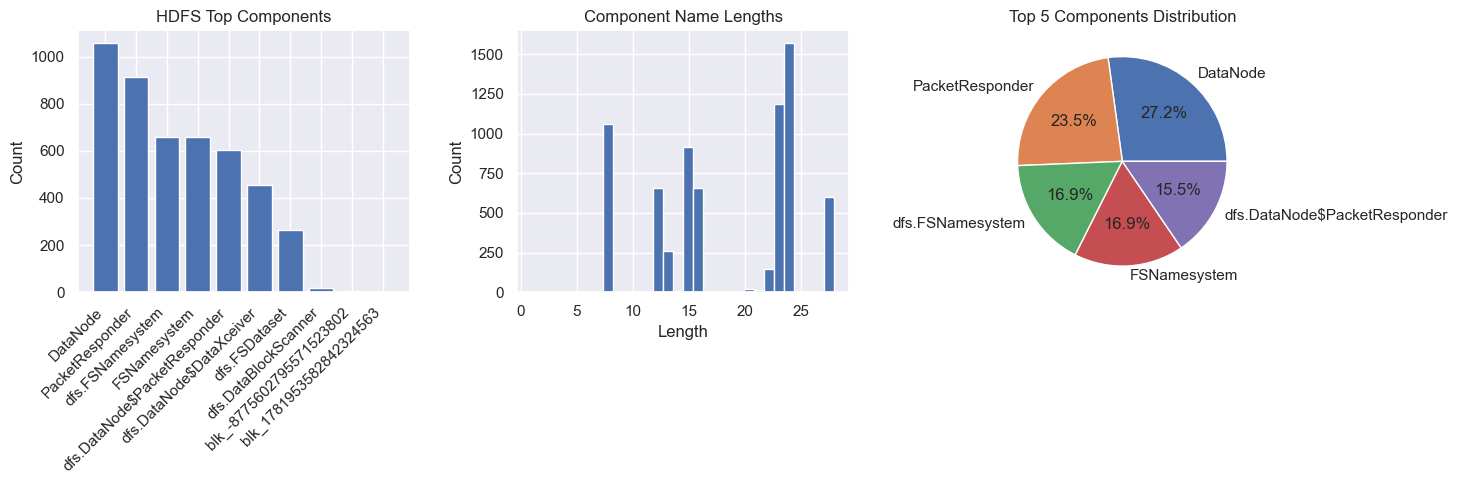


Component Categories:
Node-related components: 2116
System-related components: 0
Client-related components: 0
Block-related components: 2469

==================== Component Analysis: Apache ====================

Component Statistics:
Unique components: 25842

Top 10 components:
error: 38081
notice: 13755
client 218.144.240.75: 1002
218.144.240.75: 1002
client 210.245.233.251: 624
210.245.233.251: 624
client 211.99.203.228: 440
211.99.203.228: 440
client 80.55.121.106: 322
80.55.121.106: 322


<Figure size 640x480 with 0 Axes>

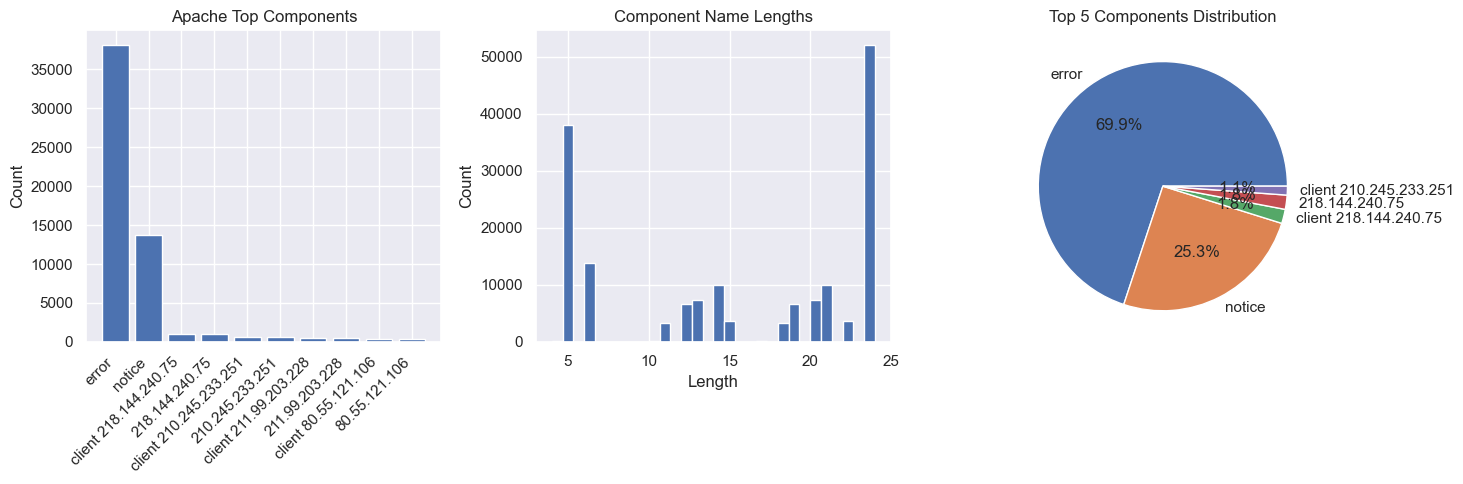


Component Categories:
Node-related components: 0
System-related components: 0
Client-related components: 0
Block-related components: 0

==================== Component Analysis: HealthApp ====================

Component Statistics:
Unique components: 249

Top 10 components:
20171230-22: 9454
20171224-20: 8939
20171224-18: 7058
201812-8: 5955
201812-22: 5899
20171225-19: 5533
20171229-12: 5519
20171224-22: 5358
20171225-23: 5292
20171226-22: 5277


<Figure size 640x480 with 0 Axes>

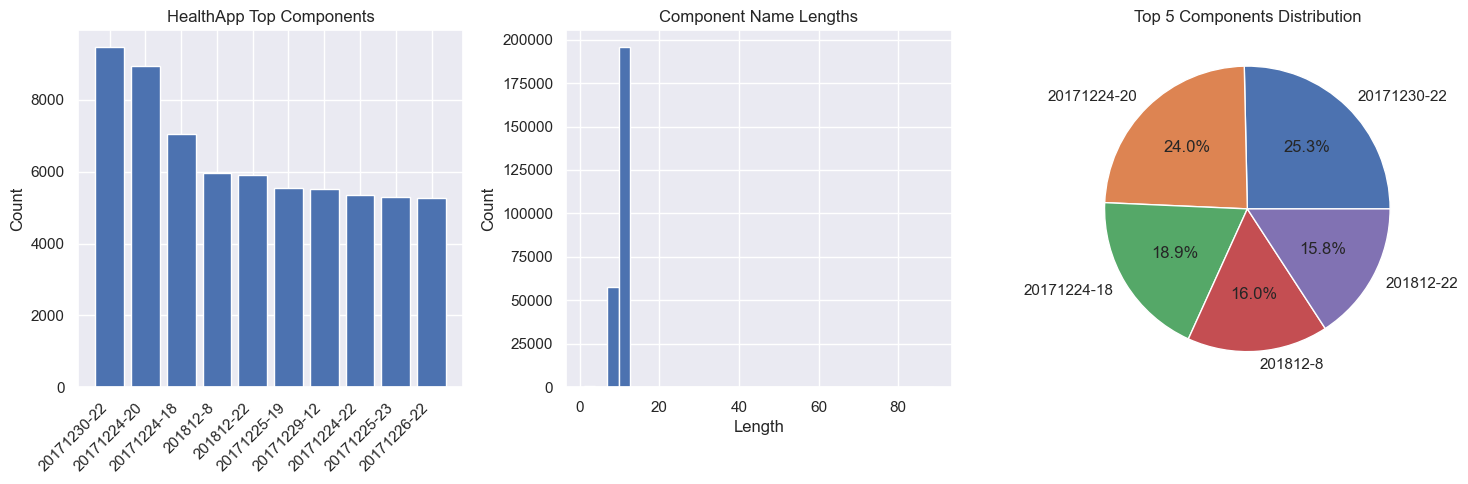


Component Categories:
Node-related components: 0
System-related components: 0
Client-related components: 0
Block-related components: 0

==================== Component Analysis: BGL ====================

Component Statistics:
Unique components: 179404

Top 10 components:
ciod: 122181
s: 117090
idoproxydb hit ASSERT condition: 84253
program interrupt: 20691
Node card VPD check: 20583
Node card status: 17513
Ido chip status changed: 11904
instruction address: 3664
exception syndrome register: 3662
machine check: 3662


<Figure size 640x480 with 0 Axes>

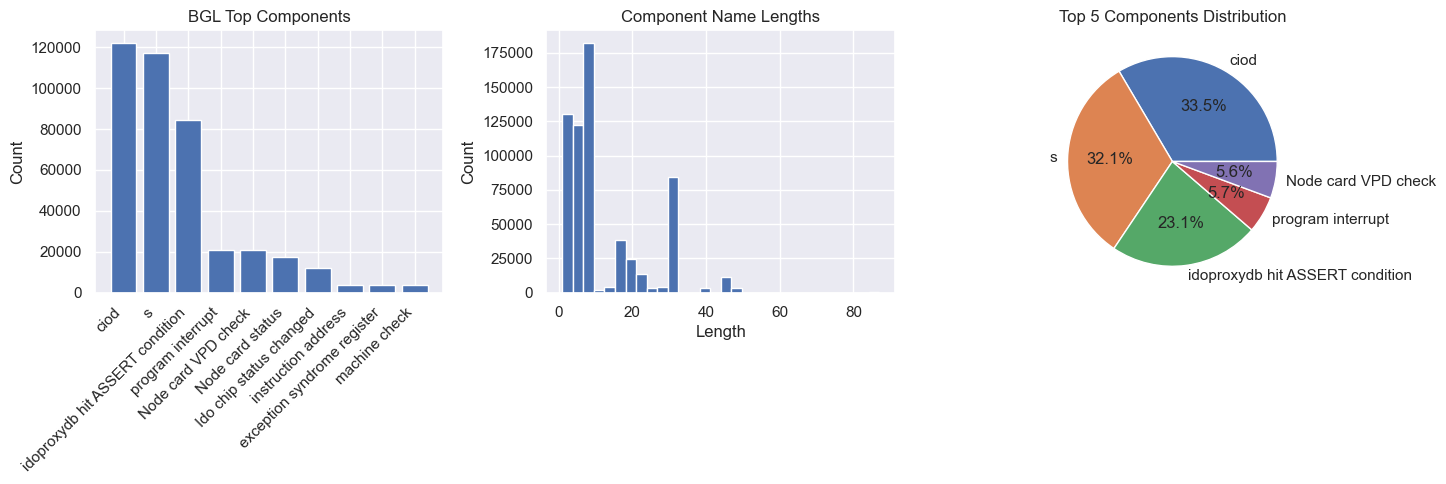


Component Categories:
Node-related components: 38096
System-related components: 0
Client-related components: 0
Block-related components: 0

==================== Component Analysis: HPC ====================

Component Statistics:
Unique components: 2195

Top 10 components:
for: 5126
41C: 420
status: 362
42C: 350
43C: 171
0-7: 93
1074289164: 84
1074288832: 82
0-31: 68
1074289165: 64


<Figure size 640x480 with 0 Axes>

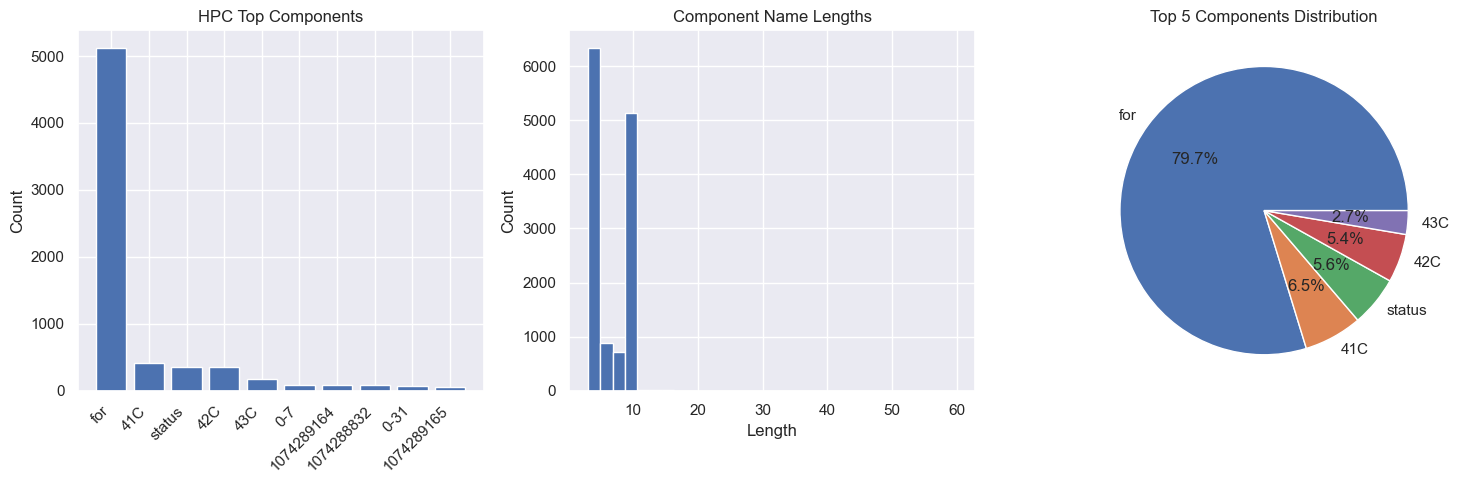


Component Categories:
Node-related components: 0
System-related components: 0
Client-related components: 0
Block-related components: 0

==================== Component Analysis: Linux ====================

Component Statistics:
Unique components: 7959

Top 10 components:
httpd: 8903
pam_unix: 5980
python: 1153
1: 239
sendmail: 230
dslb-084-057-172-016.pools.arcor-ip.net: 189
<02114408>: 102
<0212ebf3>: 90
<02114537>: 73
ext3: 71


<Figure size 640x480 with 0 Axes>

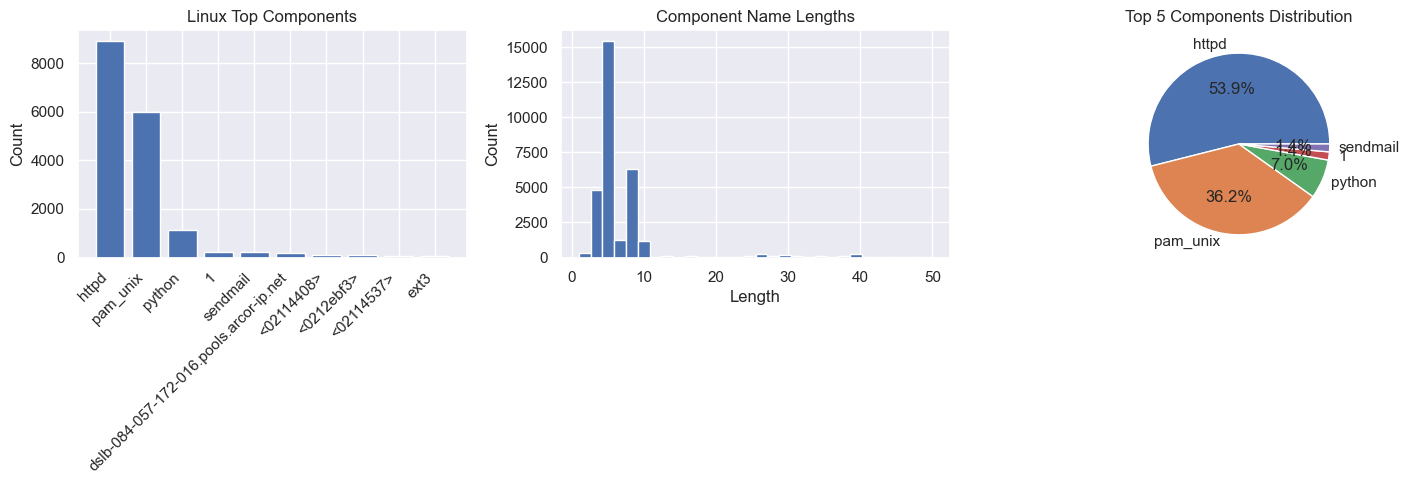


Component Categories:
Node-related components: 0
System-related components: 0
Client-related components: 0
Block-related components: 0

==================== Component Analysis: Mac ====================

Component Statistics:
Unique components: 9590

Top 10 components:
0: 41639
258: 6945
null: 4455
14463: 4056
43: 3669
10018: 3497
1: 2967
32778: 2462
184: 2294
82: 2233


<Figure size 640x480 with 0 Axes>

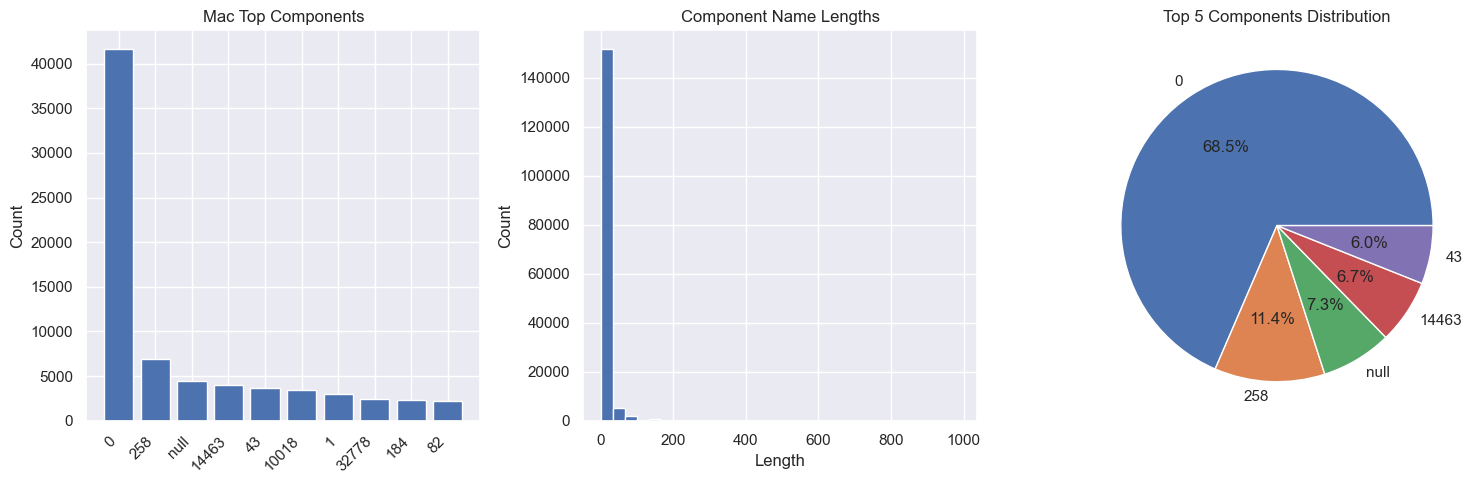


Component Categories:
Node-related components: 0
System-related components: 0
Client-related components: 1712
Block-related components: 0


<Figure size 640x480 with 0 Axes>

In [50]:
def analyze_components(name: str, logs: List[str]):
    """Analyze system components mentioned in logs"""
    print(f"\n{'='*20} Component Analysis: {name} {'='*20}")
    
    # Extract components using various patterns
    components = []
    for log in logs:
        # HDFS specific patterns
        # Look for components in various formats:
        # - Words between square brackets: [ComponentName]
        # - Words before a colon: ComponentName:
        # - Words after "INFO"/"ERROR"/"WARN": INFO ComponentName:
        # - Process/Thread IDs: (ProcessName_123)
        patterns = [
            r'\[(.*?)\]',                          # [Component]
            r'^([A-Za-z0-9_-]+):',                 # Component:
            r'(?:INFO|ERROR|WARN)\s+([^:]+):',     # INFO Component:
            r'\(([\w.-]+)\)',                      # (Component)
            r'(?:daemon|server|client)\s+([\w.-]+)',  # daemon/server/client names
            r'blk_[-\d]+',                         # HDFS block IDs
            r'BP-[\d\-]+',                         # HDFS block pool IDs
            r'DFSClient_[\w.-]+',                  # DFS Client IDs
            r'NameNode',                           # NameNode references
            r'DataNode',                           # DataNode references
            r'FSNamesystem',                       # FSNamesystem references
            r'PacketResponder',                    # PacketResponder references
        ]
        
        for pattern in patterns:
            found = re.findall(pattern, log)
            components.extend([comp for comp in found if comp])  # Add non-empty matches
    
    if components:
        component_counts = Counter(components)
        
        print(f"\nComponent Statistics:")
        print(f"Unique components: {len(component_counts)}")
        print("\nTop 10 components:")
        for comp, count in component_counts.most_common(10):
            print(f"{comp}: {count}")
        
        # Visualizations
        plt.figure(figsize=(15, 5))
        
        # Top components bar plot
        plt.subplot(131)
        top_comps = dict(component_counts.most_common(10))
        plt.bar(range(len(top_comps)), list(top_comps.values()))
        plt.xticks(range(len(top_comps)), list(top_comps.keys()), rotation=45, ha='right')
        plt.title(f"{name} Top Components")
        plt.ylabel("Count")
        
        # Component name length distribution
        plt.subplot(132)
        comp_lengths = [len(comp) for comp in components]
        plt.hist(comp_lengths, bins=30)
        plt.title("Component Name Lengths")
        plt.xlabel("Length")
        plt.ylabel("Count")
        
        # Top 5 components pie chart
        plt.subplot(133)
        top_5_comps = dict(component_counts.most_common(5))
        plt.pie(list(top_5_comps.values()), 
                labels=list(top_5_comps.keys()), 
                autopct='%1.1f%%')
        plt.title("Top 5 Components Distribution")
        
        plt.tight_layout()
         plt.savefig(f'{name.lower()}_analyze_component.png')
    
    # Now show the plot
    plt.show()
    
    # Close the figure to free memory
    plt.close()
        
        # Additional component analysis
        print("\nComponent Categories:")
        
        # Categorize components
        node_components = sum(1 for comp in components if 'Node' in comp)
        system_components = sum(1 for comp in components if 'System' in comp)
        client_components = sum(1 for comp in components if 'Client' in comp)
        block_components = sum(1 for comp in components if 'blk_' in comp)
        
        print(f"Node-related components: {node_components}")
        print(f"System-related components: {system_components}")
        print(f"Client-related components: {client_components}")
        print(f"Block-related components: {block_components}")
        
    else:
        print("No components found in the logs")
        print("\nSample log entries for format reference:")
        for log in logs[:3]:
            print(f"- {log}")

# Example usage:
analyze_components("HDFS", hdfs_logs)
analyze_components("Apache", apache_logs)
analyze_components("HealthApp", health_logs)
analyze_components("BGL", bgl_logs)
analyze_components("HPC", hpc_logs)
analyze_components("Linux", linux_logs)
analyze_components("Mac", mac_logs)